#PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING

In [1]:
#1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
def load_data():
    df = pd.read_csv('titanic_disaster.csv')
    return df
df = load_data()
df.head(10)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
#2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked


Số lượng dữ liệu thiếu:
Age         177
Cabin       687
Embarked      2
dtype: int64


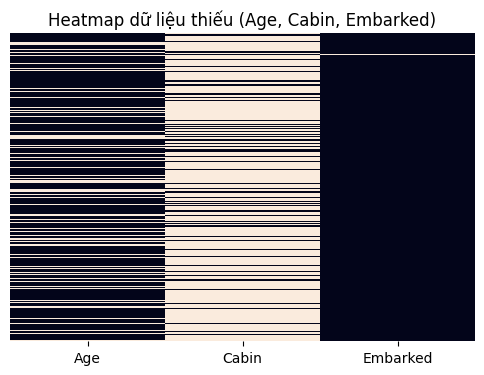

In [15]:
missing_data = df[['Age', 'Cabin', 'Embarked']].isnull().sum()
print("Số lượng dữ liệu thiếu:")
print(missing_data)
plt.figure(figsize=(6,4))
sns.heatmap(df[['Age', 'Cabin', 'Embarked']].isnull(),
            cbar=False, yticklabels=False)
plt.title("Heatmap dữ liệu thiếu (Age, Cabin, Embarked)")
plt.show()

In [16]:
#3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name

In [17]:
df[['firstName', 'secondName']] = df['Name'].str.split(',', expand=True)
df['firstName'] = df['firstName'].str.strip()
df['secondName'] = df['secondName'].str.strip()
df.drop(columns=['Name'], inplace=True)
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [18]:
#4.Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F

In [20]:
df['Sex'] = df['Sex'].replace({'male': 'M', 'female': 'F'})
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,M,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas
887,888,1,1,F,19.0,0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith
888,889,0,3,F,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,M,26.0,0,0,111369,30.0000,C148,C,Behr,Mr. Karl Howell


In [21]:
#5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.

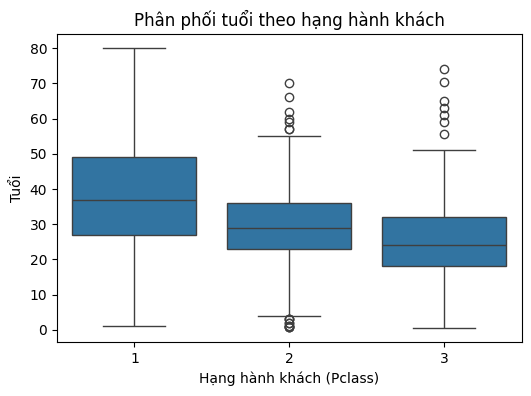

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Phân phối tuổi theo hạng hành khách')
plt.xlabel('Hạng hành khách (Pclass)')
plt.ylabel('Tuổi')
plt.show()

In [23]:
#b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map.

In [25]:
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))
df[['Age']].isnull().sum()


,0
Age,0


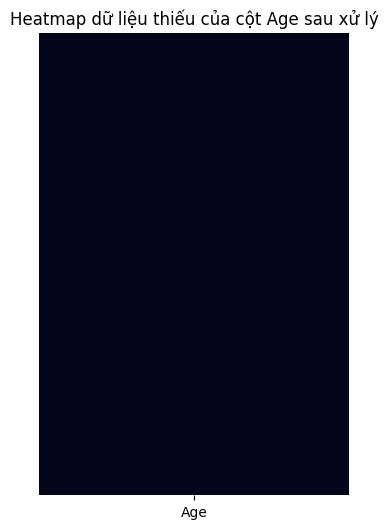

In [26]:
plt.figure(figsize=(4,6))
sns.heatmap(df[['Age']].isnull(), cbar=False, yticklabels=False)
plt.title("Heatmap dữ liệu thiếu của cột Age sau xử lý")
plt.show()


In [27]:
#6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older

In [28]:
bins = [0, 12, 18, 60, df['Age'].max()]
labels = ['Kid', 'Teen', 'Adult', 'Older']
df['Agegroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [30]:
df[['Age', 'Agegroup']].head(10)

,Age,Agegroup
0,22.00000,Adult
1,38.00000,Adult
2,26.00000,Adult
3,35.00000,Adult
4,35.00000,Adult
5,25.14062,Adult
6,54.00000,Adult
7,2.00000,Kid
8,27.00000,Adult
9,14.00000,Teen


In [31]:
#7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi “secondName”

In [32]:
df['namePrefix'] = df['secondName'].str.extract('(Mr|Mrs|Miss|Master)')
df[['secondName', 'namePrefix']].head(10)

,secondName,namePrefix
0,Mr. Owen Harris,Mr
1,Mrs. John Bradley (Florence Briggs Thayer),Mr
2,Miss. Laina,Miss
3,Mrs. Jacques Heath (Lily May Peel),Mr
4,Mr. William Henry,Mr
5,Mr. James,Mr
6,Mr. Timothy J,Mr
7,Master. Gosta Leonard,Master
8,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Mr
9,Mrs. Nicholas (Adele Achem),Mr


In [33]:
#8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch


In [34]:
df['familySize'] = 1 + df['SibSp'] + df['Parch']
df[['SibSp', 'Parch', 'familySize']].head(10)

,SibSp,Parch,familySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [35]:
#9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0. 10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính

In [37]:
df['Alone'] = df['familySize'].apply(lambda x: 1 if x == 0 else 0)
df[['familySize', 'Alone']].head(10)

,familySize,Alone
0,2,0
1,2,0
2,1,0
3,2,0
4,1,0
5,1,0
6,1,0
7,5,0
8,3,0
9,2,0


In [38]:
#10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng “Unknown”

In [39]:
df['typeCabin'] = df['Cabin'].fillna('Unknown').str[0]
df[['Cabin', 'typeCabin']].head(10)

,Cabin,typeCabin
0,NaN,U
1,C85,C
2,NaN,U
3,C123,C
4,NaN,U
5,NaN,U
6,E46,E
7,NaN,U
8,NaN,U
9,NaN,U


#PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA


In [40]:
#12. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính

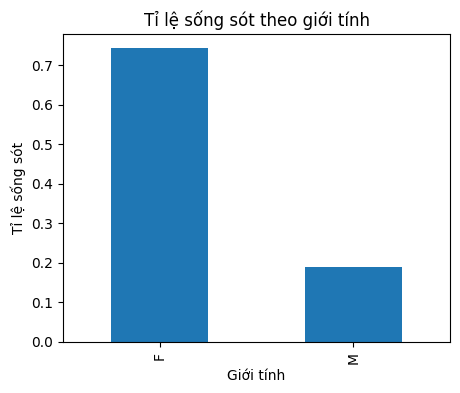

In [41]:
survival_rate = df.groupby('Sex')['Survived'].mean()
survival_rate.plot(kind='bar', figsize=(5,4))
plt.title('Tỉ lệ sống sót theo giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Tỉ lệ sống sót')
plt.show()

In [42]:
#13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).

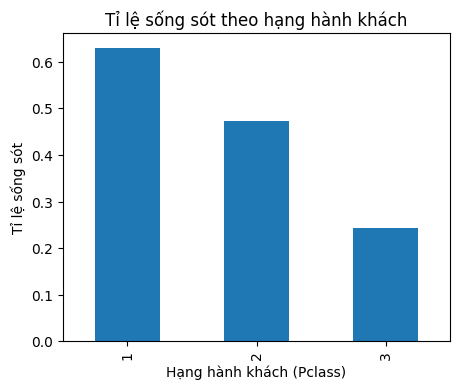

In [43]:
survival_rate_pclass = df.groupby('Pclass')['Survived'].mean()
survival_rate_pclass.plot(kind='bar', figsize=(5,4))
plt.title('Tỉ lệ sống sót theo hạng hành khách')
plt.xlabel('Hạng hành khách (Pclass)')
plt.ylabel('Tỉ lệ sống sót')
plt.show()

In [44]:
#14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác


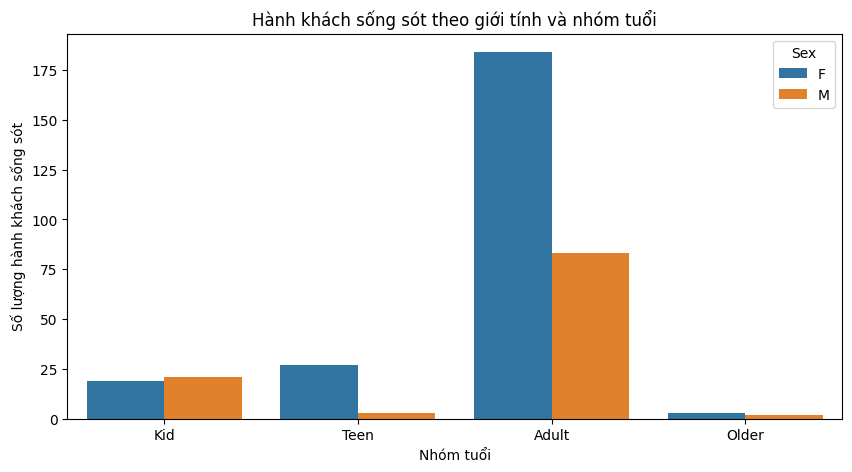

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x='Agegroup', hue='Sex', data=df[df['Survived'] == 1])
plt.title('Hành khách sống sót theo giới tính và nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng hành khách sống sót')
plt.show()

In [46]:
#15. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng


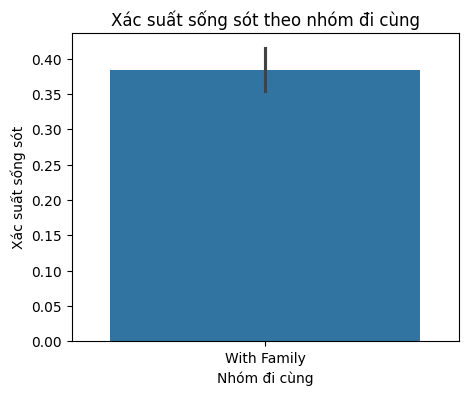

In [47]:
df['GroupType'] = df['Alone'].map({1: 'Alone', 0: 'With Family'})
plt.figure(figsize=(5,4))
sns.barplot(x='GroupType', y='Survived', data=df)
plt.title('Xác suất sống sót theo nhóm đi cùng')
plt.xlabel('Nhóm đi cùng')
plt.ylabel('Xác suất sống sót')
plt.show()

In [48]:
#16. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé


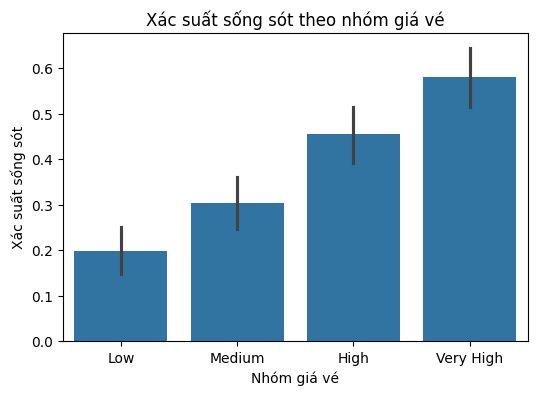

In [49]:
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(6,4))
sns.barplot(x='FareGroup', y='Survived', data=df)
plt.title('Xác suất sống sót theo nhóm giá vé')
plt.xlabel('Nhóm giá vé')
plt.ylabel('Xác suất sống sót')
plt.show()

In [50]:
#17. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và cảng sẽ cập bến.

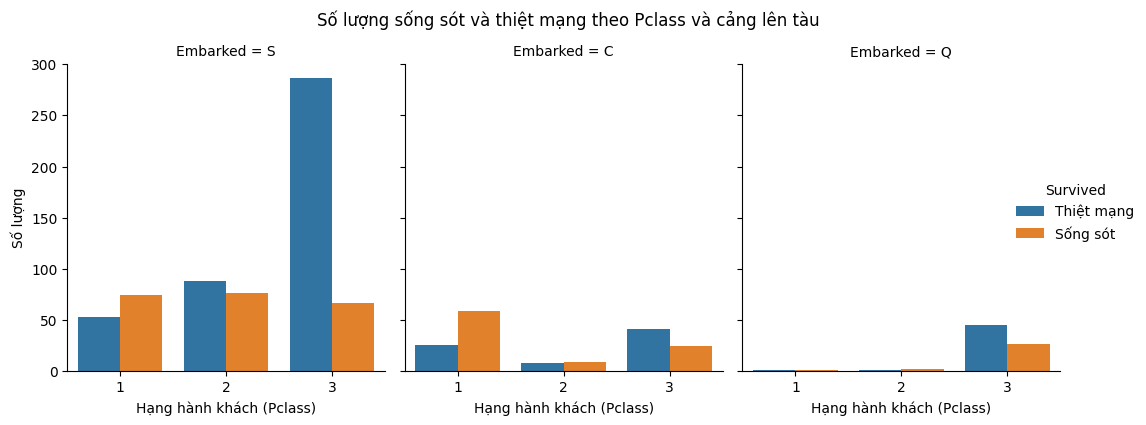

In [51]:
g = sns.catplot(data=df,x='Pclass',hue='Survived',col='Embarked',kind='count',height=4,aspect=0.9)
g.fig.suptitle('Số lượng sống sót và thiệt mạng theo Pclass và cảng lên tàu', y=1.05)
g.set_axis_labels('Hạng hành khách (Pclass)', 'Số lượng')
g._legend.set_title('Survived')
g._legend.texts[0].set_text('Thiệt mạng')
g._legend.texts[1].set_text('Sống sót')
plt.show()